<a href="https://colab.research.google.com/github/jvallalta/ia3/blob/main/n_armed_bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N-Armed Bandit

Vamos a analizar en este cuaderno el comportamiento del compromiso entre exploración y explotación.
Para ello vamos a implementar un N-armed Bandit y estudiaremos diferentes estrategias de apuesta:
Una estrategia greedy
Dos estrategias epsilon-greedy

Visualizaremos los resultados de las gráficas de recompensa para ver su evolución



In [1]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline



#### Ejercicio 1.1:  
Completa el código con la línea en '??'

In [2]:
class eps_bandit:
    '''
    epsilon-greedy k-bandit problem
    
    Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    
    def __init__(self, k, eps, iters, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        
        #ESTA ES LA DEFINICION DE LA FUNCION Q(a) PARA CADA A (PARA CADA MAQUINA)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)    #<<<---------Ejercicio 1.4
  
  
    #EJECUTA UNA ACCION
  
    def pull(self):
        # Generate random number
        p = np.random.rand()
        
        #DEFINICION DE LAS POLITICAS
        #PARA LA POLITICA GREEDY, SE ELIJE EN LA PRIMERA ITERACION
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)
         
        #Calculo de la recompensa
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        #ESTA INSTRUCCION ES LA ACTUALIZACION DE  LA FUNCION Q(a)
        #USANDO LA FORMULA ITERATIVA DE CALCULAR LA MEDIA
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    #ESTA FUNCION EJECUTA LA ANTERIOR EL NUMERO DE ITERACIONES ESTABLECIDO
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

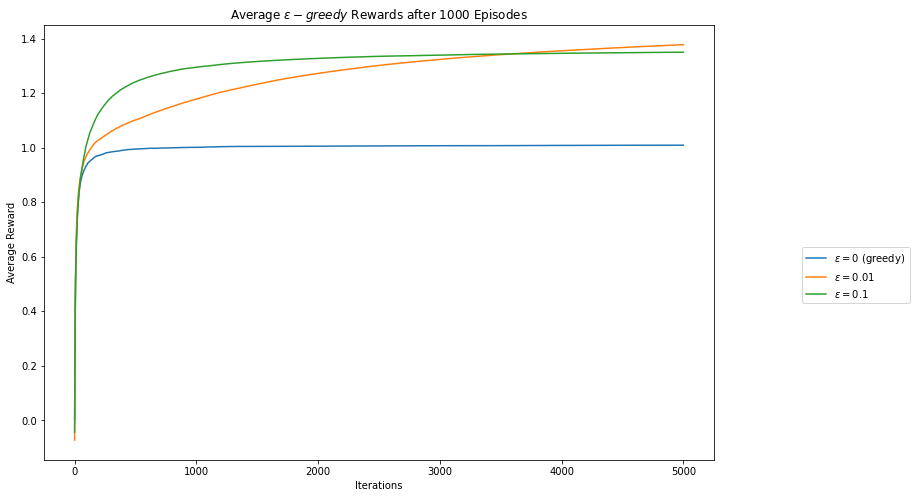

In [4]:
#VAMOS A HACER TRES EXPERIMENTOS: 
#1. Política Greedy
#2. Política Epsilon-Greedy con epsilon = 0.01
#3. Política epsilon-greedy con epsilon = 0.1
#LOS VALORES DE LAS MEDIAS SE ELIGEN ENTRE 0 y 1 CON UNA gausiana

k = 10
iters = 5000

#GENERAMOS ESTRUCTURAS PARA LOS TRES EXPERIMENTOS QUE VAMOS A HACER
#ESTAS VARIABLES ACUMULARAN LA MEDIA DE LAREWARD OBTENIDA EN CADA ITERACION
#ES DECIR eps_0_rewards[5] ACUMULA LA MEDIA DE LOS VALORES DE REWARD 
#EN LA ITERACION 5 CALCULADA SOBRE 1000 EJECUCIONES
#ESTOS VALORES SON LOS QUE SE REPRESENTAN EN LAS GRAFICAS
eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

#SE HACEN 1000 EJECUCIONES (episodes)  DE LOS EXPERIMENTOS 
#CON 1000 INTENTOS (ACCIONES) CADA UNO
episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters)
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    
    # Update long-term averages
    #Son vectores de longitud 'iters' que almacenan  el valor medio de cada iteracion para 1000 episodes
    #donde cada episode es un conjunto de 'iters' acciones
    #ES DECIR eps_0_rewards[5] ACUMULA LA MEDIA DE LOS VALORES DE REWARD 
    #EN LA ITERACION 5 CALCULADA SOBRE 1000 EJECUCIONES
    #ESTOS VALORES SON LOS QUE SE REPRESENTAN EN LAS GRAFICAS
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) 
    + " Episodes")
plt.show()

#### Ejercicio 1.2: 
Fíjate en la gráfica de epsilon =0. ¿por qué no es una línea horizontal desde el primer momento si siempre en un episodio tiene el mismo valor?. Responde a continuación en esta caja.



#### Ejercicio 1.3: 
¿qué sería necesario que cambiara para que la politica epsilon =0.01 tuviese mejor resultado que la epsilon=0.1. Responde a continuación



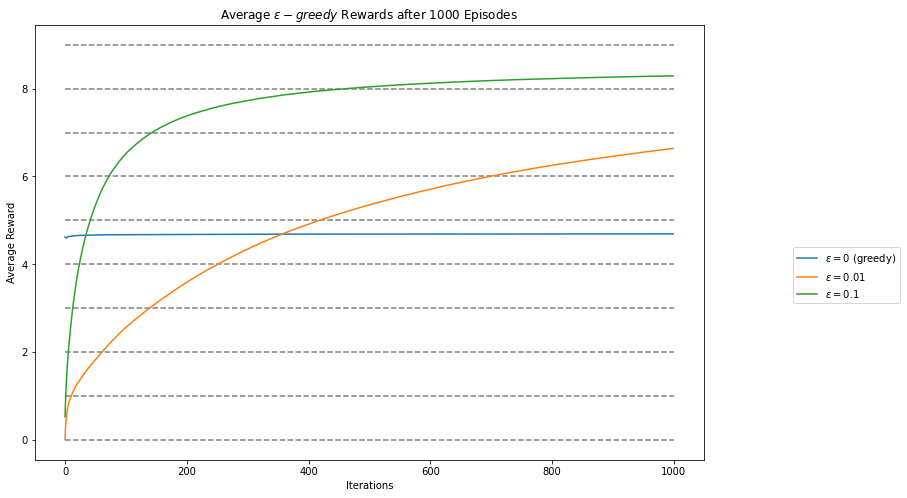

In [5]:
#AHORA LAS REWARDS MEDIAS DE CADA ACCION VAN DE 0 a 9 
#(0, para la accion 0, 1 para la  accion 1 etc.)
k = 10
iters = 1000

#ESTAS VARIABLES ACUMULARAN LA MEDIA DE LA REWARD OBTENIDA EN CADA ITERACION
#ES DECIR eps_0_rewards[5] ACUMULA LA MEDIA DE LOS VALORES DE REWARD 
#EN LA ITERACION 5 CALCULADA SOBRE 1000 EJECUCIONES
#ESTOS VALORES SON LOS QUE SE REPRESENTAN EN LAS GRAFICAS
eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)


eps_0_selection = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection = np.zeros(k)

#SE HACEN 1000 EJECUCIONES (episodes)  DE LOS EXPERIMENTOS 
#CON 1000 INTENTOS (ACCIONES) CADA UNO
episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters, mu='sequence')
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
    # Average actions per episode
    eps_0_selection = eps_0_selection + (
        eps_0.k_n - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (
        eps_01.k_n - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (
        eps_1.k_n - eps_1_selection) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.5,
              linestyle="--")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + 
     str(episodes) + " Episodes")
plt.show()

#### Ejercicio 1.4: 
¿En qué influyen el valor de las recompensas en la forma de las gráficas? ¿Por qué?


#### Ejercicio 1.5:
Modifica el valor de las recompensas cambiando los argumentos de la función señalada en el código de la segunda caja de python (señalada con <<<-------Ejercicio 1.5) para tener unos valores más grandes de recompensas y vuelve a ejecutar el codigo para obtener otrras gráficas en este apartado. ¿Cambia la situación, en qué sentido? ¿Qué puedes concluir acerca del valor absoluto de las recompensas usadas? Responde a continuación:






#### Ejercicio 1.6:
Implementa la función de exploración Softmax. Experimenta con diferentes temperaturas (0.5,1,5,10,...) y observa las gráficas que salen. 
Compáralas con las obtenidas para epsilon-greedy. Escribe tus conclusiones a continuación

In [ ]:
#Implementa aquí el problema con Softmax. Copia y pega del codigo anterior 
#todo salvo la implementación y uso de SoftMax.